In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

In [4]:
os.listdir()

['mobile_price.csv', 'NaiveBayes_MobilePriceRange_Pred.ipynb']

In [5]:
mob = pd.read_csv('mobile_price.csv')
mob.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
mob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
mob.dtypes.value_counts()

int64      19
float64     2
dtype: int64

In [8]:
mob.shape

(2000, 21)

In [9]:
mob.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

No missing values in data set.

#### Univariate Analysis

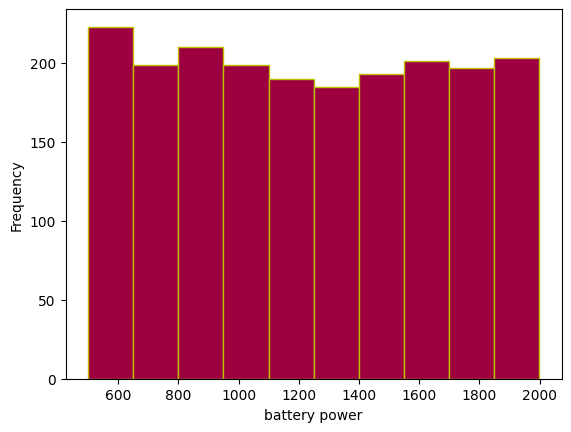

In [10]:
mob['battery_power'].plot(kind = 'hist', cmap = 'Spectral', edgecolor = 'y')
plt.xlabel('battery power')
plt.show()

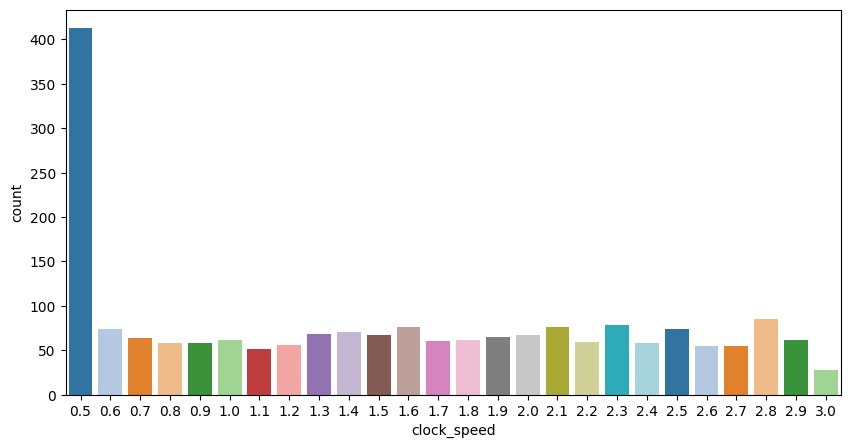

In [11]:
plt.figure(figsize = [10,5])
sns.countplot(x = mob['clock_speed'], data = mob, palette = 'tab20')
plt.show()

In [12]:
mob['fc'].unique()

array([ 1,  0,  2, 13,  3,  4,  5,  7, 11, 12, 16,  6, 15,  8,  9, 10, 18,
       17, 14, 19], dtype=int64)

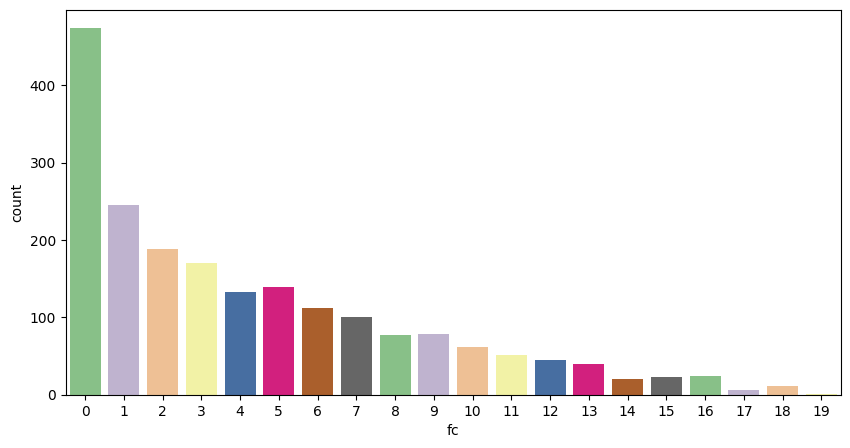

In [13]:
plt.figure(figsize = [10,5])
sns.countplot(x = mob['fc'], data = mob, palette = 'Accent')
plt.show()

In [14]:
mob['int_memory'].nunique()

63

In [15]:
mob['m_dep'].unique()

array([0.6, 0.7, 0.9, 0.8, 0.1, 0.5, 1. , 0.3, 0.4, 0.2])

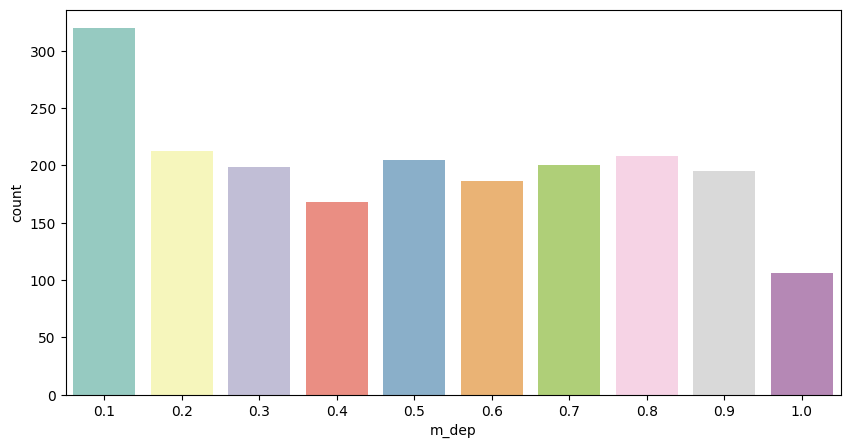

In [16]:
plt.figure(figsize = [10,5])
sns.countplot(x = mob['m_dep'], data = mob, palette = 'Set3')
plt.show()

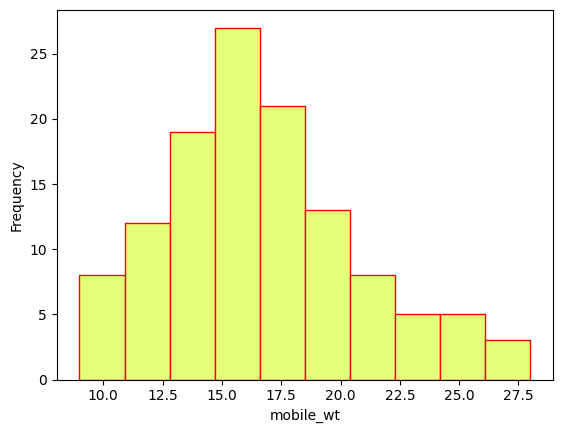

In [17]:
mob['mobile_wt'].value_counts().plot(kind = 'hist', cmap = 'Wistia', edgecolor = 'r')
plt.xlabel('mobile_wt')
plt.show()

In [18]:
mob['n_cores'].unique()

array([2, 3, 5, 6, 1, 8, 4, 7], dtype=int64)

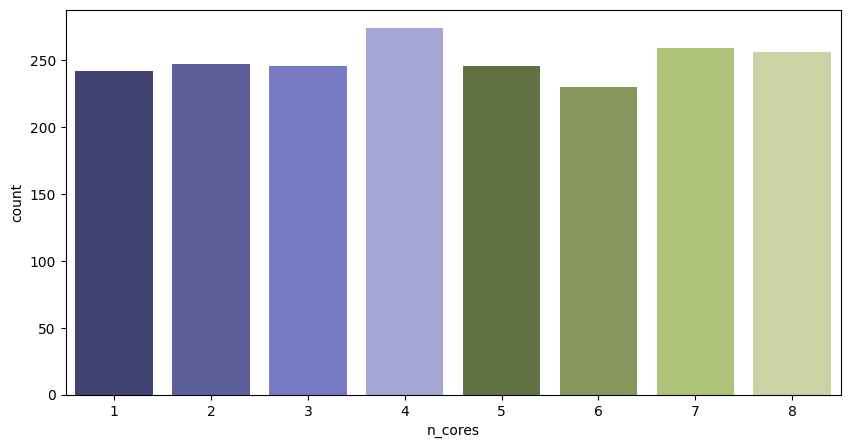

In [19]:
plt.figure(figsize = [10,5])
sns.countplot(x = mob['n_cores'], data = mob, palette = 'tab20b')
plt.show()

In [20]:
mob['pc'].unique()

array([ 2,  6,  9, 14,  7, 10,  0, 15,  1, 18, 17, 11, 16,  4, 20, 13,  3,
       19,  8,  5, 12], dtype=int64)

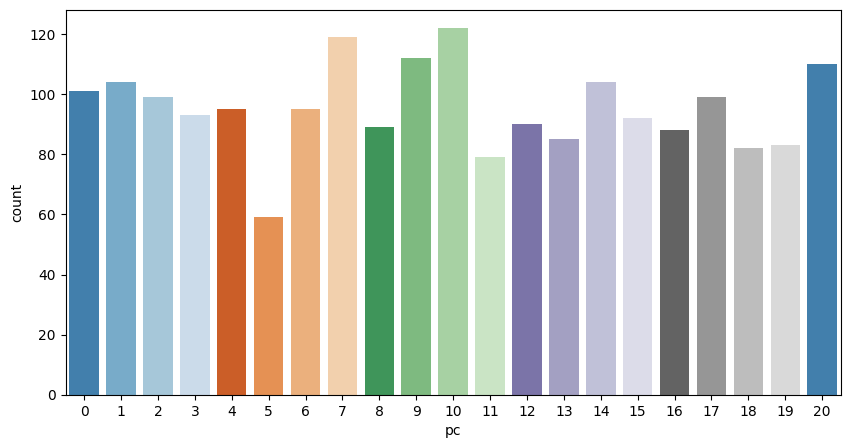

In [21]:
plt.figure(figsize = [10,5])
sns.countplot(x = mob['pc'], data = mob, palette = 'tab20c')
plt.show()

In [22]:
mob['sc_h'].unique()

array([ 9, 17, 11, 16,  8, 13, 19,  5, 14, 18,  7, 10, 12,  6, 15],
      dtype=int64)

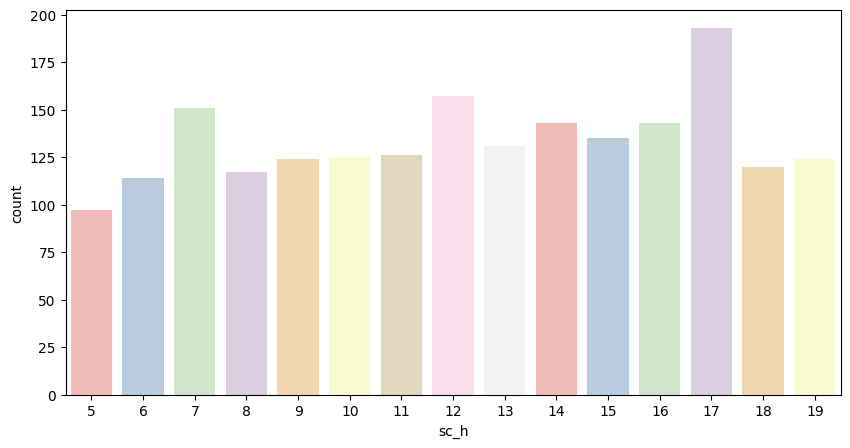

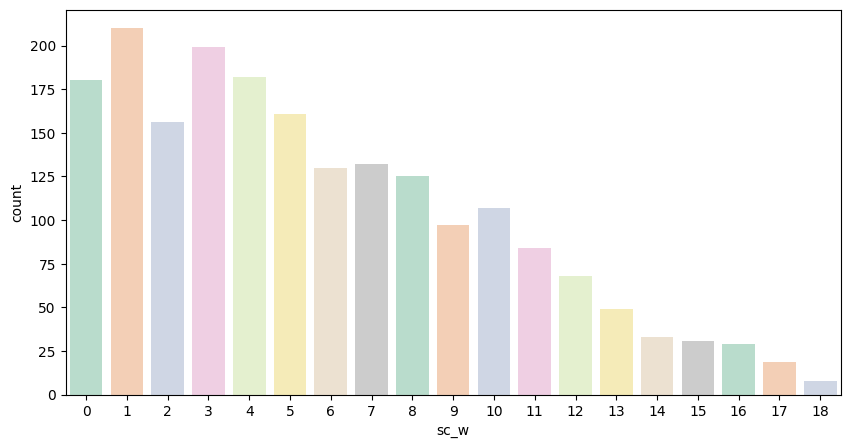

In [23]:
plt.figure(figsize = [10,5])
sns.countplot(x = mob['sc_h'], data = mob, palette = 'Pastel1')
plt.show()

plt.figure(figsize = [10,5])
sns.countplot(x = mob['sc_w'], data = mob, palette = 'Pastel2')
plt.show()

In [24]:
mob['talk_time'].unique()

array([19,  7,  9, 11, 15, 10, 18,  5, 20, 12, 13,  2,  4,  3, 16,  6, 14,
       17,  8], dtype=int64)

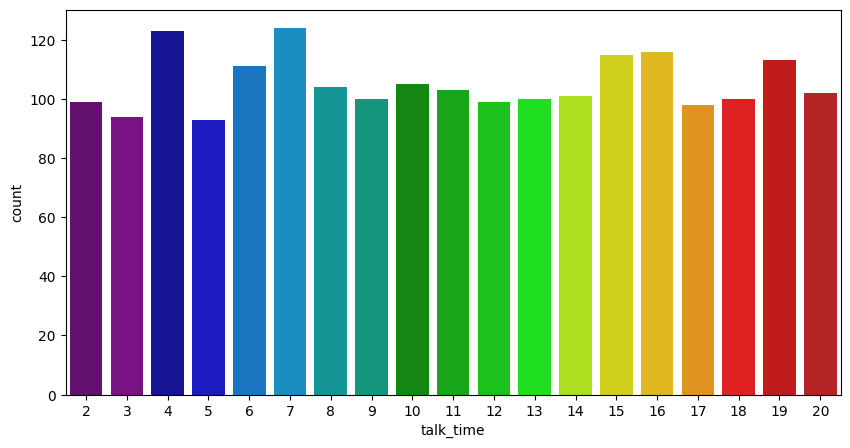

In [25]:
plt.figure(figsize = [10,5])
sns.countplot(x = mob['talk_time'], data = mob, palette = 'nipy_spectral')
plt.show()

In [26]:
pd.crosstab(mob['blue'], mob['price_range'])

price_range,0,1,2,3
blue,,,,
0,257,255,257,241
1,243,245,243,259


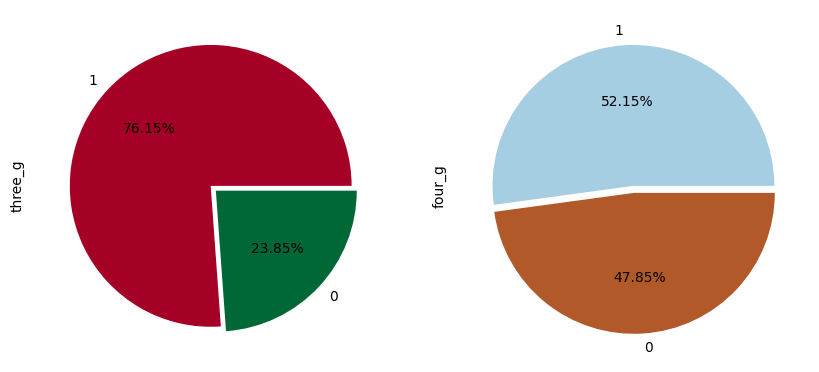

In [27]:
fig, ax = plt.subplots(1, 2, figsize = [10,10])
mob['three_g'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0, 0.05], cmap = 'RdYlGn', ax = ax[0])
mob['four_g'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0, 0.05], cmap = 'Paired', ax = ax[1])
plt.show()

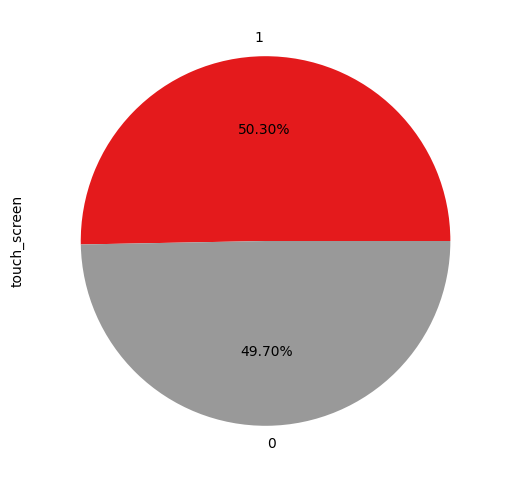

In [28]:
mob['touch_screen'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [6,6], cmap = 'Set1')
plt.show()

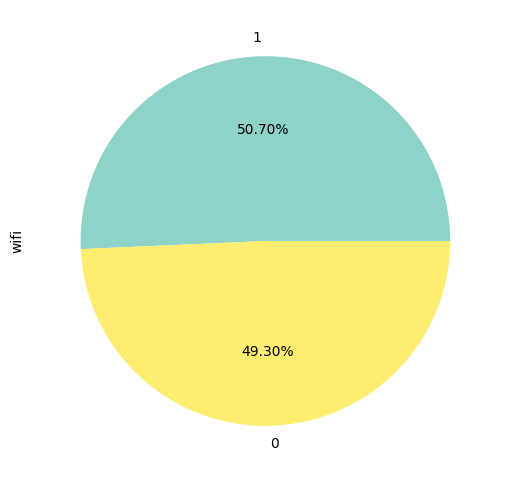

In [29]:
mob['wifi'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', cmap = 'Set3', figsize = [6,6])
plt.show()

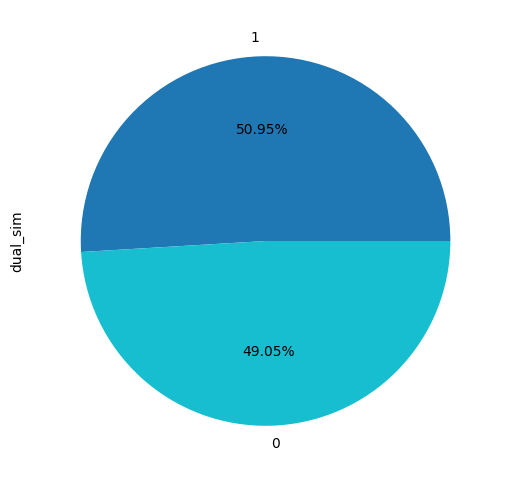

In [30]:
mob['dual_sim'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', cmap = 'tab10', figsize = [6,6])
plt.show()

In [31]:
mob['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

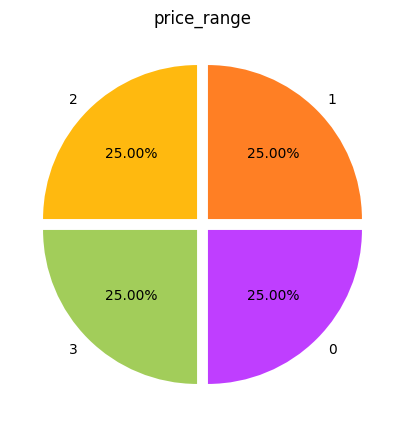

In [32]:
plt.figure(figsize = [5,5])
plt.pie(mob['price_range'].value_counts(), autopct = '%0.2f%%', labels = mob['price_range'].value_counts().index,
        explode = [0.05,0.05,0.05,0.05], colors = ['#FF7F24', '#FFB90F', '#A2CD5A', '#BF3EFF'])
plt.title('price_range')
plt.show()

In [33]:
mob.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [34]:
mob1 = mob.astype({'three_g' : str, 'four_g' : str, 'wifi': str, 'touch_screen': str, 'dual_sim' : str, 'blue' : str})
mob1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   object 
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   object 
 18  touch_sc

#### Bivariate Analysis

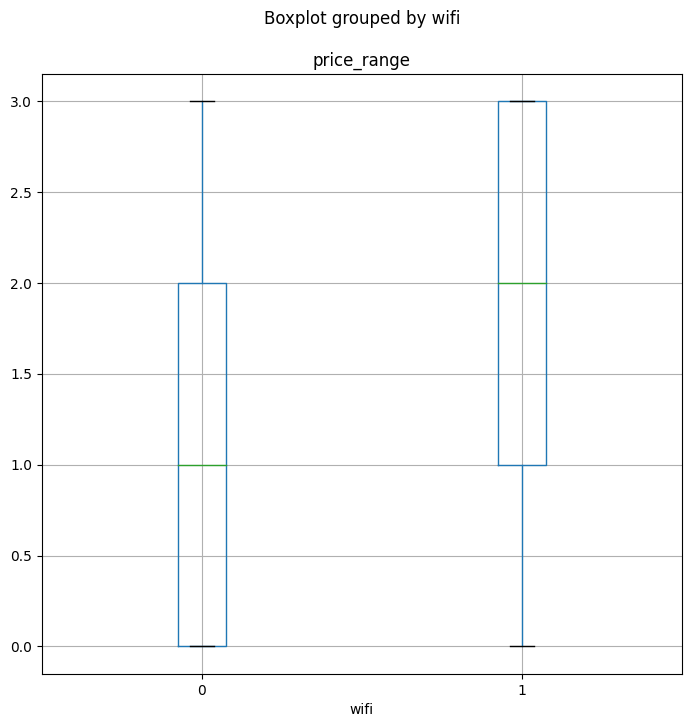

In [35]:
mob1.boxplot(column="price_range",       
                 by= 'wifi',    
                 figsize= (8,8))
plt.show()

Phones with no wifi are lesser priced as compared to phone with wifi.

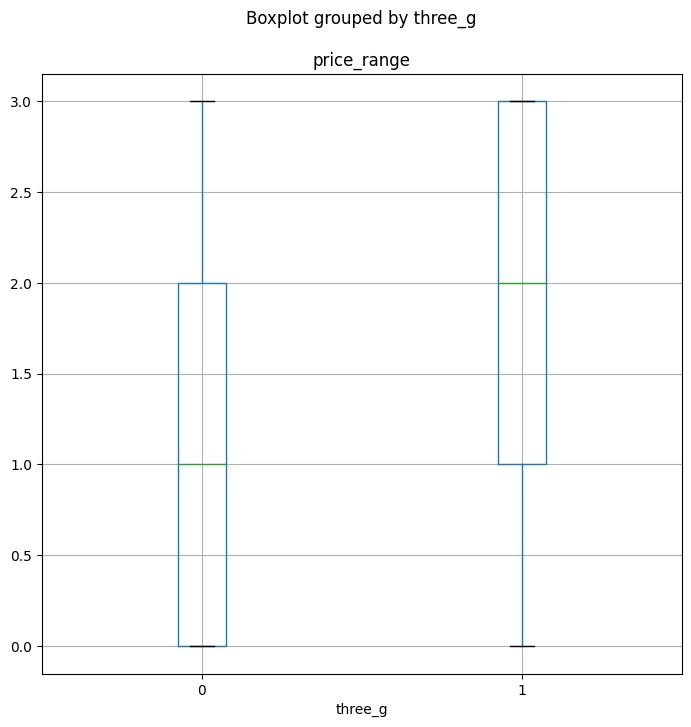

In [36]:
mob1.boxplot(column="price_range",     
                 by= 'three_g',     
                 figsize= (8,8))
plt.show()

Phones which have three_g feature are expensive as compared to phones which doesn't have three_g.

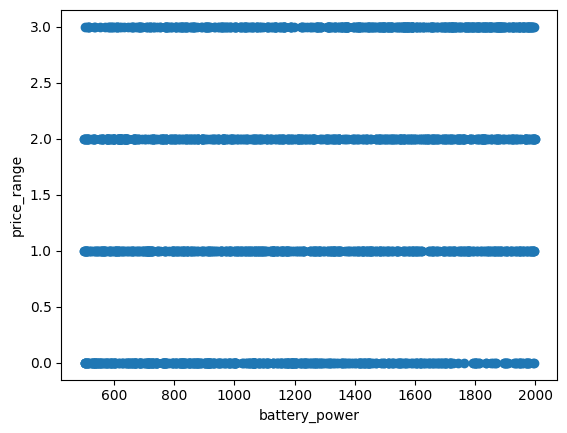

In [37]:
plt.scatter(mob1['battery_power'], mob1['price_range']) # no relationship 
plt.xlabel('battery_power')
plt.ylabel('price_range')
plt.show()

In [38]:
pd.crosstab(mob1['blue'], mob1['price_range'])

price_range,0,1,2,3
blue,,,,
0,257,255,257,241
1,243,245,243,259


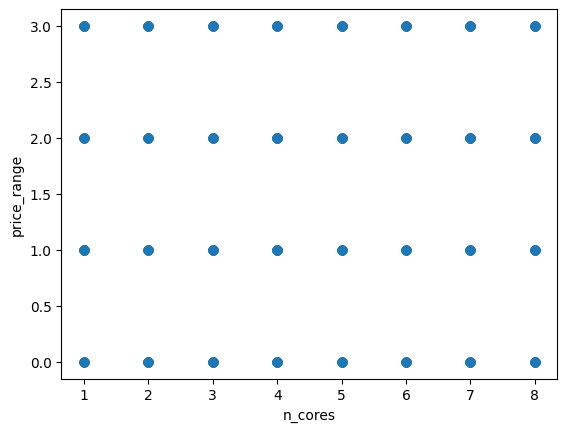

In [39]:
plt.scatter(mob1['n_cores'], mob1['price_range'])
plt.xlabel('n_cores')
plt.ylabel('price_range')
plt.show()

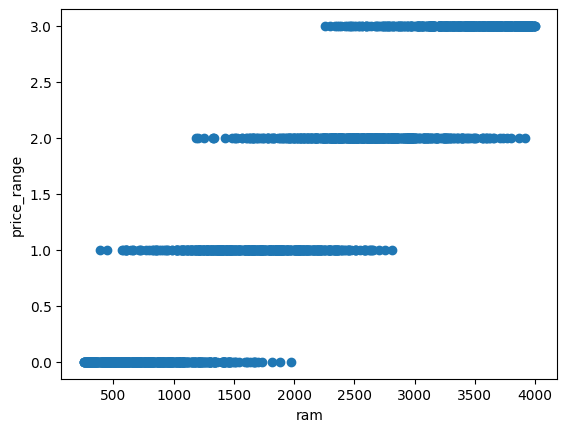

In [40]:
plt.scatter(mob1['ram'], mob1['price_range']) 
plt.xlabel('ram')
plt.ylabel('price_range')
plt.show()

As ram increases, price range also increases. They follow linear relationship.

#### Checking Correlation

C:\Users\krish\AppData\Local\Temp\ipykernel_1712\3761212890.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = mob1.corr()


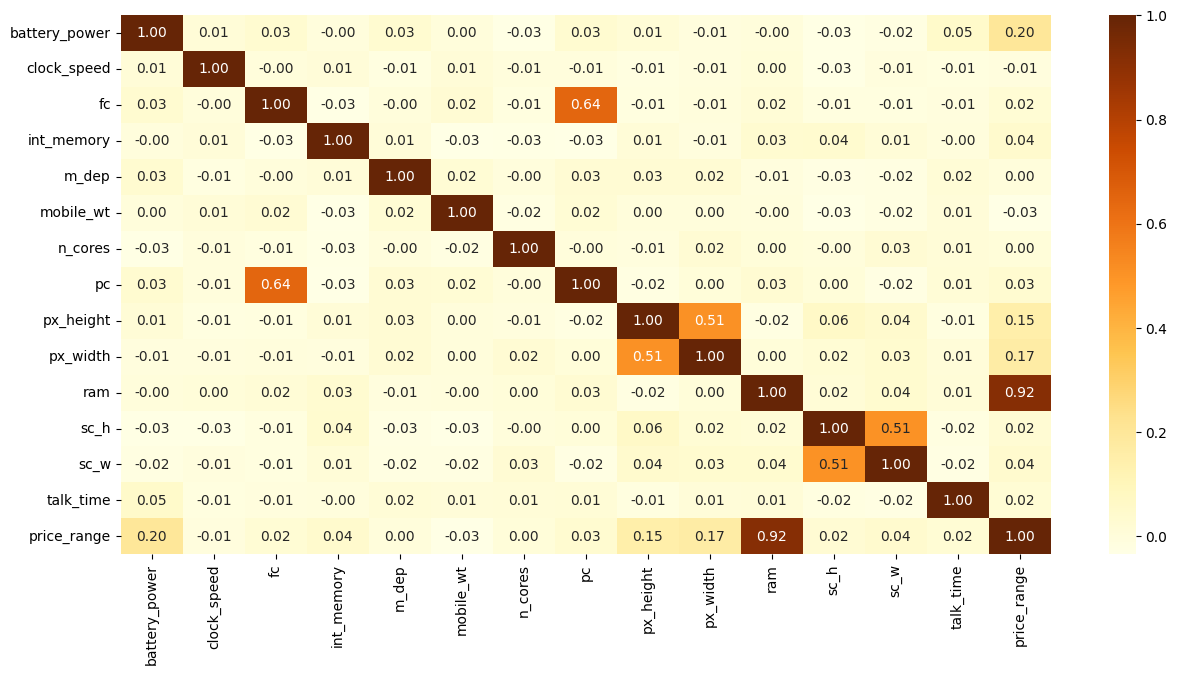

In [41]:
corr = mob1.corr()
plt.figure(figsize = [15,7])
sns.heatmap(corr, annot = True, cmap = 'YlOrBr', fmt = '0.2f')
plt.show()

Based on the above correlation matrix, correlation among the variables have been observed. For example, 
"price_range" is highly correlated with "ram" and moderately correlated with "battery_power", "px_height", "px_width" and others. 

It also show the multicollinearity. For example: the correlation between pc and fc is high (0.64)


#### Checking Outliers

In [42]:
mob1.describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.25,0.50,0.75,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,95%,96%,97%,98%,99%,max
battery_power,2000.0,1238.51850,439.418206,501.0,510.00,524.96,538.97,556.92,570.95,851.75,1226.0,1615.25,1930.15,1946.08,1961.06,1974.00,1987.00,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.50,0.50,0.50,0.50,0.50,0.70,1.5,2.20,2.80,2.90,2.90,2.90,3.00,3.0
fc,2000.0,4.30950,4.341444,0.0,0.00,0.00,0.00,0.00,0.00,1.00,3.0,7.00,13.00,14.00,15.00,16.00,16.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,2.00,2.00,3.00,4.00,5.00,16.00,32.0,48.00,61.00,62.00,63.00,63.00,64.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.10,0.10,0.10,0.10,0.10,0.20,0.5,0.80,1.00,1.00,1.00,1.00,1.00,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,80.00,82.00,83.00,84.00,86.00,109.00,141.0,170.00,196.00,197.00,198.00,199.00,199.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,1.00,1.00,1.00,1.00,1.00,3.00,4.0,7.00,8.00,8.00,8.00,8.00,8.00,8.0
pc,2000.0,9.91650,6.064315,0.0,0.00,0.00,0.00,0.00,0.00,5.00,10.0,15.00,20.00,20.00,20.00,20.00,20.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,15.00,30.98,45.97,58.00,70.95,282.75,564.0,947.25,1485.05,1568.04,1618.03,1698.00,1791.01,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,512.99,526.96,542.00,562.00,579.85,874.75,1247.0,1633.00,1929.05,1947.00,1963.00,1974.00,1987.00,1998.0


#### Outliers Treatment

In [43]:
mob1['fc'] = np.where(mob1['fc'] > 16.0, 16.0, mob1['fc'])

In [44]:
mob1['px_height'] = np.where(mob1['px_height'] > 1791.01, 1791.01, mob1['px_height'])
mob1['px_height'] = np.where(mob1['px_height'] < 15.00, 15.00, mob1['px_height'])

In [45]:
mob1['sc_w'] = np.where(mob1['sc_w'] == 0, np.nan, mob1['sc_w'])

In [46]:
mob1['sc_w'].mean(), mob1['sc_w'].median()

(6.337362637362637, 6.0)

In [47]:
# replacing 180 nan values with median
mob1['sc_w'].fillna(mob1['sc_w'].median(), inplace = True)

In [48]:
mob1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [49]:
mob2 = mob1.astype({'price_range' : str})

#### Dummy Creation

In [50]:
mob_cleaned = pd.get_dummies(columns=['price_range'], data = mob2)
mob_cleaned.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range_0', 'price_range_1',
       'price_range_2', 'price_range_3'],
      dtype='object')

In [51]:
mob_dummy = pd.get_dummies(mob_cleaned, drop_first=True)
mob_dummy.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range_0', 'price_range_1', 'price_range_2',
       'price_range_3', 'blue_1', 'dual_sim_1', 'four_g_1', 'three_g_1',
       'touch_screen_1', 'wifi_1'],
      dtype='object')

In [52]:
y = mob_dummy[['price_range_0', 'price_range_1', 'price_range_2', 'price_range_3']]
X = mob_dummy.drop(columns = ['price_range_0', 'price_range_1', 'price_range_2', 'price_range_3'])

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=99)

#### Standardization 

In [54]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

X_train_sc1 = pd.DataFrame(X_train_sc,columns=X_train.columns)

X_test_sc1 = pd.DataFrame(X_test_sc,columns=X_test.columns)

### Randon Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'max_depth':[7,10,14],
              'min_samples_split':[10,15,19,25],
              'n_estimators':[200,250,300],
              'bootstrap': [True, False],
              'max_features': ['auto', 'log2', None],
              'criterion': ['entropy', 'gini']}

fit_rf = RandomForestClassifier(random_state=42)

cv_rf = RandomizedSearchCV(fit_rf, param_dist, cv = 10, n_jobs = -1, verbose = True)

cv_rf.fit(X_train_sc1, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [7, 10, 14],
                                        'max_features': ['auto', 'log2', None],
                                        'min_samples_split': [10, 15, 19, 25],
                                        'n_estimators': [200, 250, 300]},
                   verbose=True)

In [57]:
cv_rf.best_params_

{'n_estimators': 250,
 'min_samples_split': 25,
 'max_features': None,
 'max_depth': 7,
 'criterion': 'entropy',
 'bootstrap': True}

In [58]:
rf =RandomForestClassifier(n_estimators = 250,
                           max_depth = 14, 
                           criterion = 'entropy',
                           min_samples_split = 19,
                           max_features = None,
                           bootstrap = False)

rf.fit(X_train_sc1, y_train)

print("Train Accuracy :", rf.score(X_train_sc1, y_train))
print("Test Accuracy :", rf.score(X_test_sc1, y_test))

Train Accuracy : 0.9373333333333334
Test Accuracy : 0.82


In [59]:
rf3 =RandomForestClassifier(n_estimators = 250,
                           max_depth = 5, 
                           criterion = 'gini',
                           min_samples_split = 10,
                           max_features = None,
                           bootstrap = True)

rf3.fit(X_train_sc1, y_train)

print("Train Accuracy :", rf3.score(X_train_sc1,y_train))
print("Test Accuracy :", rf3.score(X_test_sc1,y_test))

Train Accuracy : 0.9086666666666666
Test Accuracy : 0.852


In [60]:
rf3.feature_importances_

array([1.15477286e-01, 5.95118092e-04, 4.65460771e-04, 1.86631304e-03,
       9.04311107e-04, 4.64505092e-03, 4.19530803e-04, 1.16687076e-03,
       6.75537779e-02, 4.88754661e-02, 7.55945943e-01, 5.73797482e-04,
       5.65270401e-04, 7.82581643e-04, 2.12081777e-05, 4.68384069e-05,
       1.60947046e-05, 3.56340926e-05, 2.23374565e-05, 2.11085274e-05])

#### Selecting Important features 

In [61]:
feats = pd.DataFrame({'Var' : X_train_sc1.columns, 'Imp' : rf3.feature_importances_}).sort_values(by = ['Imp'], ascending = False)
feats

,Var,Imp
10,ram,0.755946
0,battery_power,0.115477
8,px_height,0.067554
9,px_width,0.048875
5,mobile_wt,0.004645
3,int_memory,0.001866
7,pc,0.001167
4,m_dep,0.000904
13,talk_time,0.000783
1,clock_speed,0.000595


<AxesSubplot: >

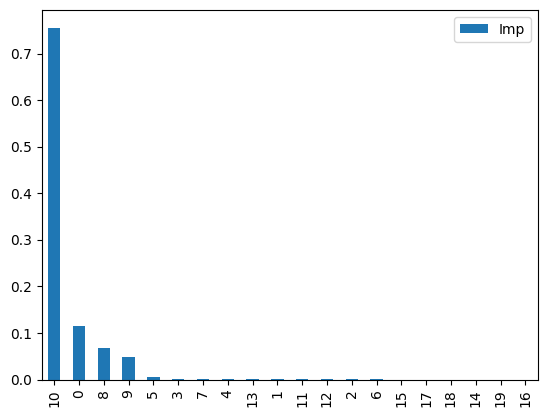

In [62]:
feats.plot(kind = 'bar')

In [63]:
impfeat = feats[feats['Imp'] >= 0.004387]
impfeat

,Var,Imp
10,ram,0.755946
0,battery_power,0.115477
8,px_height,0.067554
9,px_width,0.048875
5,mobile_wt,0.004645


In [64]:
imp = impfeat['Var'].values
imp

array(['ram', 'battery_power', 'px_height', 'px_width', 'mobile_wt'],
      dtype=object)

In [65]:
xx1 = X_train_sc1[imp]
xx2 = X_test_sc1[imp]

In [66]:
rf4 =RandomForestClassifier(n_estimators = 250,
                           max_depth = 5, 
                           criterion = 'gini',
                           min_samples_split = 10,
                           max_features = None,
                           bootstrap = True)

rf4.fit(xx1, y_train)

print("Train Accuracy :", rf4.score(xx1,y_train))
print("Test Accuracy :", rf4.score(xx2,y_test))

Train Accuracy : 0.9166666666666666
Test Accuracy : 0.85


### Naive Bayes Classifier

In [67]:
y=mob1["price_range"]
X=mob1.drop(["price_range"], axis=1)

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=99)

In [69]:
mn=MinMaxScaler()

mn_fit=mn.fit(X_train)

X_train_mn=mn_fit.transform(X_train)

X_test_mn=mn_fit.transform(X_test)

X_train_mn=pd.DataFrame(X_train_mn,columns=X_train.columns)

X_test_mn=pd.DataFrame(X_test_mn,columns=X_test.columns)


In [70]:
mm=MultinomialNB()
mm.fit(X_train_mn, y_train)
print("Train Accuracy ",mm.score(X_train_mn, y_train))
print("Test Accuracy ",mm.score(X_test_mn, y_test))

Train Accuracy  0.661875
Test Accuracy  0.5825


In [71]:
pd.DataFrame(mm.predict(X_train_mn)) 

,0
0,2
1,0
2,3
3,2
4,1
...,...
1595,3
1596,2
1597,1
1598,1


In [72]:
pd.DataFrame(mm.predict_proba(X_train_mn))

,0,1,2,3
0,0.157567,0.247799,0.303959,0.290674
1,0.301453,0.256184,0.229136,0.213227
2,0.142037,0.258446,0.269448,0.330069
3,0.171437,0.259328,0.295019,0.274216
4,0.252048,0.267999,0.243874,0.236079
...,...,...,...,...
1595,0.202636,0.262078,0.253046,0.282240
1596,0.163920,0.278477,0.280433,0.277170
1597,0.267147,0.292038,0.213162,0.227653
1598,0.228703,0.282528,0.260573,0.228196


In [73]:
pred_train=mm.predict(X_train_mn)
pred_test=mm.predict(X_test_mn)

In [74]:
print(metrics.classification_report(y_train, pred_train)) 

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       406
           1       0.59      0.62      0.61       401
           2       0.51      0.41      0.46       390
           3       0.65      0.76      0.70       403

    accuracy                           0.66      1600
   macro avg       0.66      0.66      0.66      1600
weighted avg       0.66      0.66      0.66      1600



In [75]:
print(metrics.classification_report(y_test, pred_test)) 

              precision    recall  f1-score   support

           0       0.83      0.74      0.79        94
           1       0.47      0.58      0.52        99
           2       0.49      0.36      0.42       110
           3       0.58      0.68      0.63        97

    accuracy                           0.58       400
   macro avg       0.59      0.59      0.59       400
weighted avg       0.59      0.58      0.58       400



<AxesSubplot: >

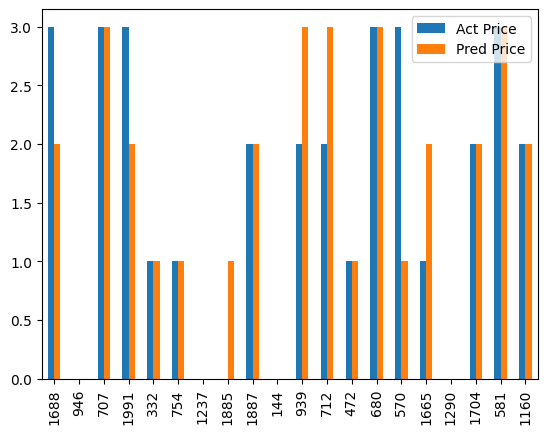

In [76]:
Pred = pd.DataFrame({'Act Price' : y_train, 'Pred Price' : pred_train})
Pred.head(20).plot(kind = 'bar')